In [2]:
import numpy as np

In [3]:
def calcul_prob(N,num,eta,var):
    case = 0
    for i in range(num):
        ais = np.random.normal(0,var,N)
        ais = ais ** 2
        temp = np.max(ais) + np.min(ais)
        if temp < 2/eta:
            case += 1
    prob = case/num
    return prob

def calcul_prob_gen(N,num, eta, var, dim, batch):
    case = 0
    for i in range(num):
        hi_star = np.zeros((dim,dim))
        sigma_max = 0
        for n in range(N):
            his = np.zeros((dim,dim))
            for j in range(batch):
                ais = np.random.normal(0,var,(dim,1))
                his += ais @ ais.T / batch
            tmp_norm = np.linalg.norm(np.identity(dim) - eta * his)
            if tmp_norm >= sigma_max:
                sigma_max = tmp_norm
                hi_star = his
        eig_list = np.linalg.eig(hi_star)[0]
        eig_max = 0
        itm_max = 0
        for item in eig_list:
            tmp = np.abs(1 - eta * item)
            if tmp >= itm_max:
                eig_max = item
                itm_max = tmp
        if eig_max< (1/eta):
            case += 1
    prob = case/num
    return prob
            

def calcul_rho(N, num, eta, var, dim, batch):
    N = 1
    tmp_list = []
    for i in range(num):
        his = np.zeros((dim,dim))
        for j in range(batch):
            ais = np.random.normal(0,var,(dim,1))
            his += ais @ ais.T / batch
        Id = np.kron(np.identity(dim), np.identity(N))
        H = np.kron( np.identity(N), his)
#         ais = np.random.normal(0,var,dim)
#         his = np.dot(ais.T, ais) / batch
#         h_list = h_list ** 2
#         H = np.diag(h_list)
        tmp_H = Id - eta * H
#         print(tmp_H)
        tmp_list.append(np.log(np.linalg.norm(tmp_H[0])))
#         print(np.log(np.linalg.det(tmp_H)))
#     print(H)
#     print(np.linalg.norm(tmp_H))
    return np.mean(tmp_list)

In [4]:
N_list = [1,2,5,7,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50]
# eta_list = np.linspace(0,0.1,10)
eta_list = [0.1,0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
prob_list = np.zeros((len(N_list), len(eta_list)))
rho_list = np.zeros(len(eta_list))
num = 10000
var = 1
dim = 100
batch = 100

for i in range(len(N_list)):
    for j in range(len(eta_list)):
        N = N_list[i]
        eta = eta_list[j]
        prob_list[i][j] = 1 - 2*calcul_prob(N,num,eta,var)
#     rho_list[j] = calcul_rho(N, num, eta,var, dim, batch)

In [5]:
N_name = []
for i in N_list:
    N_name.append('N='+str(i))
eta_name = []
for j in eta_list:
    eta_name.append(r'$\eta=$'+str(j))
import pandas as pd
df = pd.DataFrame(data = prob_list, index=N_name, columns = eta_name)
df

,$\eta=$0.1,$\eta=$0.15,$\eta=$0.2,$\eta=$0.25,$\eta=$0.3,$\eta=$0.35,$\eta=$0.4,$\eta=$0.45,$\eta=$0.5,$\eta=$0.55,$\eta=$0.6,$\eta=$0.65,$\eta=$0.7,$\eta=$0.75,$\eta=$0.8,$\eta=$0.85,$\eta=$0.9,$\eta=$0.95,$\eta=$1
N=1,-0.9984,-0.9804,-0.9524,-0.9006,-0.8614,-0.8210,-0.7664,-0.7272,-0.6672,-0.6410,-0.6298,-0.5682,-0.5352,-0.4890,-0.4776,-0.4352,-0.4270,-0.3868,-0.3666
N=2,-1.0000,-0.9988,-0.9884,-0.9632,-0.9274,-0.8894,-0.8400,-0.7826,-0.7232,-0.6952,-0.6156,-0.5742,-0.5254,-0.4746,-0.4410,-0.3800,-0.3390,-0.3062,-0.2730
N=5,-0.9998,-0.9966,-0.9838,-0.9446,-0.9000,-0.8236,-0.7420,-0.6464,-0.5692,-0.4562,-0.3512,-0.2734,-0.1912,-0.1224,-0.0790,0.0078,0.0680,0.1324,0.1856
N=7,-0.9998,-0.9974,-0.9742,-0.9262,-0.8620,-0.7682,-0.6600,-0.5384,-0.4358,-0.3166,-0.2068,-0.0964,-0.0132,0.0784,0.1514,0.2300,0.3118,0.3496,0.4292
N=10,-1.0000,-0.9954,-0.9672,-0.9054,-0.8144,-0.6820,-0.5184,-0.3708,-0.2446,-0.1162,0.0106,0.1524,0.2422,0.3198,0.4156,0.4744,0.5224,0.6054,0.6474
N=12,-0.9994,-0.9942,-0.9596,-0.8848,-0.7746,-0.6376,-0.4660,-0.2850,-0.1282,0.0182,0.1542,0.2840,0.3714,0.4382,0.5318,0.6068,0.6546,0.7098,0.7398
N=15,-1.0000,-0.9942,-0.9542,-0.8632,-0.7240,-0.5506,-0.3662,-0.1556,0.0126,0.1594,0.3142,0.4308,0.5300,0.6048,0.6674,0.7446,0.7836,0.8128,0.8556
N=17,-0.9992,-0.9906,-0.9486,-0.8478,-0.6872,-0.5014,-0.2858,-0.0940,0.0822,0.2634,0.3914,0.5276,0.6034,0.6946,0.7502,0.7960,0.8438,0.8670,0.8944
N=20,-0.9998,-0.9896,-0.9428,-0.8254,-0.6364,-0.4168,-0.2068,0.0242,0.2026,0.3568,0.5072,0.6154,0.7124,0.7660,0.8302,0.8614,0.8950,0.9196,0.9388
N=22,-0.9998,-0.9864,-0.9272,-0.8066,-0.6098,-0.3738,-0.1362,0.0852,0.2824,0.4448,0.5798,0.6804,0.7712,0.8144,0.8520,0.8978,0.9216,0.9434,0.9552


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: linewidths is ignored by contourf
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

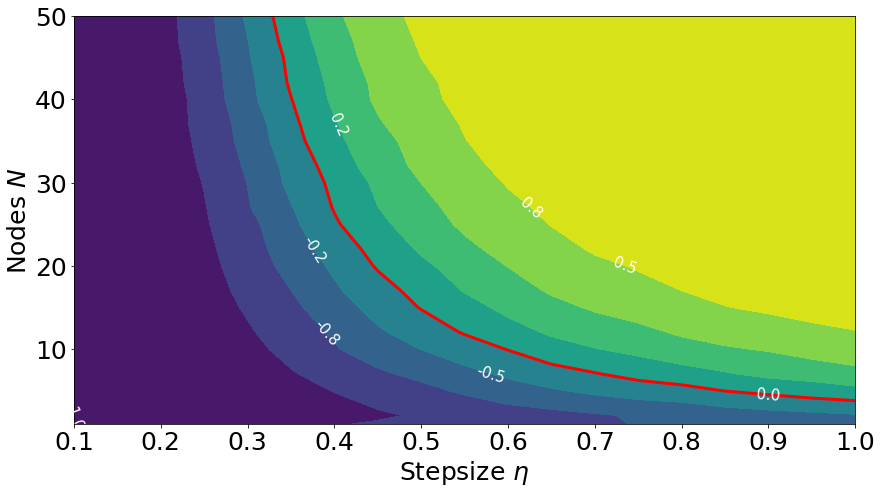

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,7.5))
Y = np.array([1,2,5,7,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50])
X = np.array([0.1,0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=15, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)
plt.figure()